In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Austrian/Austrian(SKG_AMS).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,16:10:00,22:10:00,3,4,1,2,0,222,1741.71
1,16:15:00,09:15:00,4,5,1,1,1,110,149.77
2,16:15:00,20:20:00,4,5,1,1,0,220,149.77
3,16:15:00,20:20:00,4,5,1,1,0,220,1122.27
4,16:15:00,22:10:00,4,5,1,2,0,222,1741.71


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 9 columns):
departure_time      849 non-null object
arrival_time        849 non-null object
days_before         849 non-null int64
day_of_week         849 non-null int64
num_of_luggage      849 non-null int64
num_of_stops        849 non-null int64
overnight_flight    849 non-null int64
Class               849 non-null int64
price               849 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 59.8+ KB


In [7]:
df.shape

(849, 9)

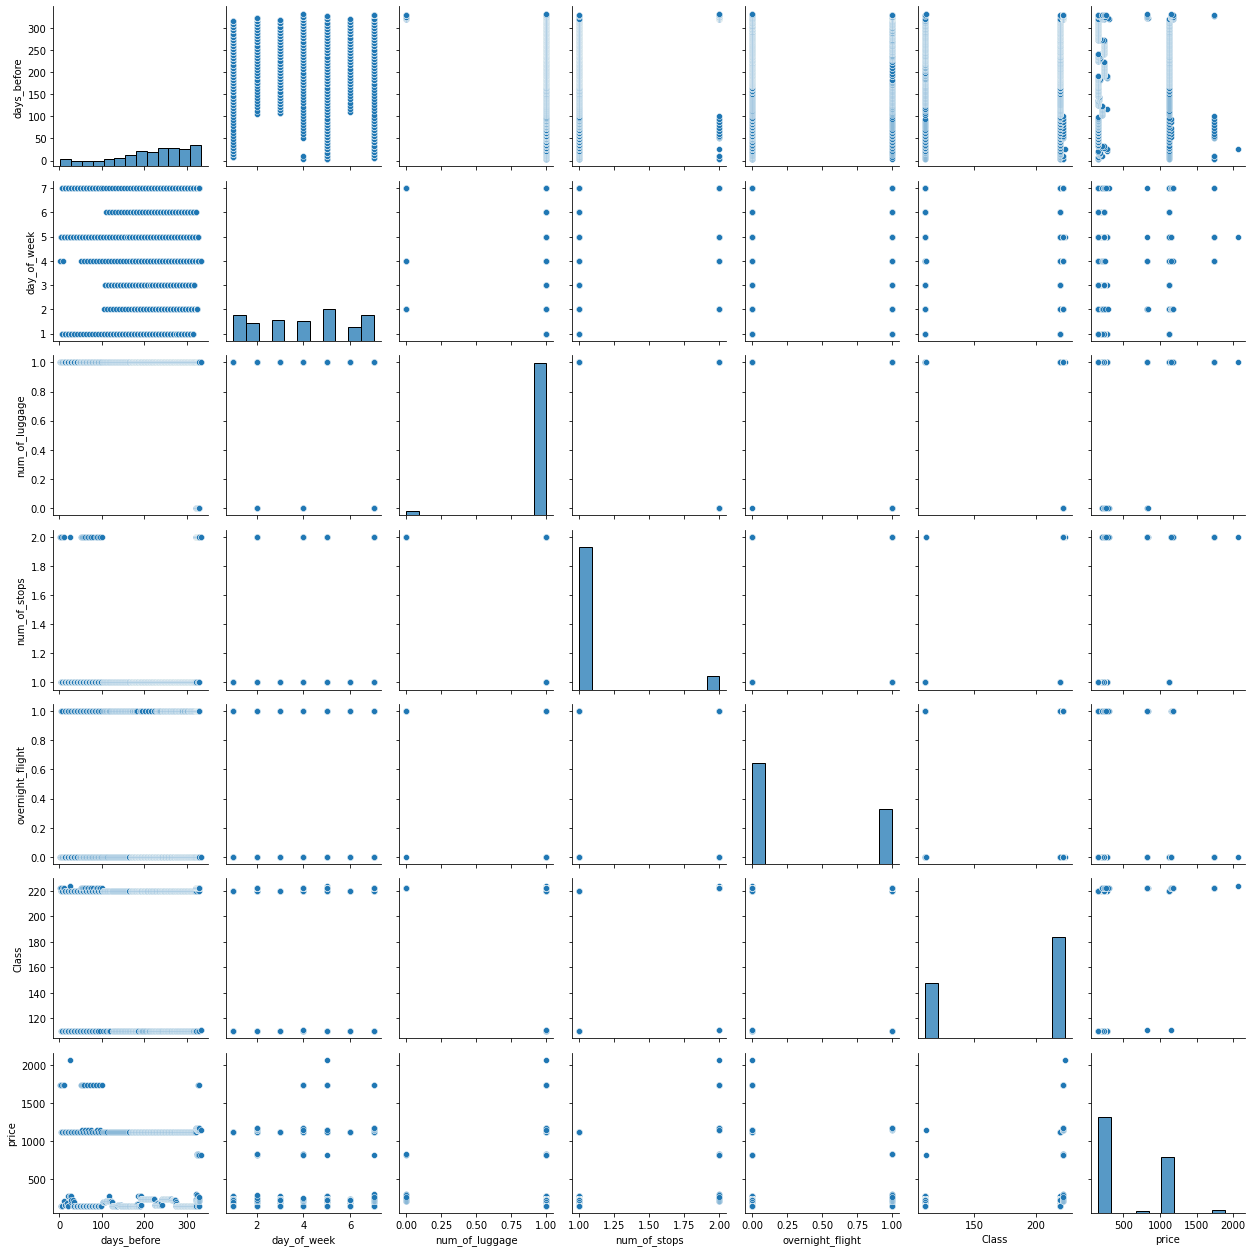

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 16:10:00,1900-01-01 22:10:00,3,4,1,2,0,222,1741.71
1,1900-01-01 16:15:00,1900-01-01 09:15:00,4,5,1,1,1,110,149.77
2,1900-01-01 16:15:00,1900-01-01 20:20:00,4,5,1,1,0,220,149.77
3,1900-01-01 16:15:00,1900-01-01 20:20:00,4,5,1,1,0,220,1122.27
4,1900-01-01 16:15:00,1900-01-01 22:10:00,4,5,1,2,0,222,1741.71


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 16:10:00,1900-01-01 22:10:00,3,4,1,2,0,222,1741.71,-2208930600000000000,-2208909000000000000
1,1900-01-01 16:15:00,1900-01-01 09:15:00,4,5,1,1,1,110,149.77,-2208930300000000000,-2208955500000000000
2,1900-01-01 16:15:00,1900-01-01 20:20:00,4,5,1,1,0,220,149.77,-2208930300000000000,-2208915600000000000
3,1900-01-01 16:15:00,1900-01-01 20:20:00,4,5,1,1,0,220,1122.27,-2208930300000000000,-2208915600000000000
4,1900-01-01 16:15:00,1900-01-01 22:10:00,4,5,1,2,0,222,1741.71,-2208930300000000000,-2208909000000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,4,3,1,2,0,222,1741.71
1,5,4,1,1,1,110,149.77
2,5,4,1,1,0,220,149.77
3,5,4,1,1,0,220,1122.27
4,5,4,1,2,0,222,1741.71


In [21]:
df.to_csv('skg_ams_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [3]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.5749180485139033


In [4]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7427343835427416


In [5]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7490649172440511


In [6]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7490595492696102


In [7]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.6365654664647364


In [8]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.749055932340468


In [9]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.40183649876830274


In [10]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.3664955442751092


In [11]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
22/22 [==============================] - 2s 11ms/step - loss: 388752.3438 - val_loss: 386512.5312
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 201480.5469 - val_loss: 221541.7812
Epoch 3/200
22/22 [==============================] - 0s 4ms/step - loss: 165017.1094 - val_loss: 179777.8750
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 159761.2188 - val_loss: 175368.4062
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 160058.7500 - val_loss: 181316.3281
Epoch 6/200
22/22 [==============================] - 0s 4ms/step - loss: 161475.0625 - val_loss: 173726.2188
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 158061.0469 - val_loss: 190661.5625
Epoch 8/200
22/22 [==============================] - 0s 4ms/step - loss: 170494.1094 - val_loss: 188202.7344
Epoch 9/200
22/22 [==============================] - 0s 4ms/step - loss: 161722.6562 - val_loss: 175002.6094
Epoch 10/200
22/22

22/22 [==============================] - 0s 5ms/step - loss: 87992.3750 - val_loss: 158478.8438
Epoch 150/200
22/22 [==============================] - 0s 5ms/step - loss: 92988.9219 - val_loss: 143688.0312
Epoch 151/200
22/22 [==============================] - 0s 4ms/step - loss: 90155.5312 - val_loss: 251002.0469
Epoch 152/200
22/22 [==============================] - 0s 5ms/step - loss: 89013.2656 - val_loss: 153969.1406
Epoch 153/200
22/22 [==============================] - 0s 4ms/step - loss: 89244.7344 - val_loss: 173307.0312
Epoch 154/200
22/22 [==============================] - 0s 4ms/step - loss: 87854.1641 - val_loss: 169571.8281
Epoch 155/200
22/22 [==============================] - 0s 5ms/step - loss: 88661.7031 - val_loss: 146527.6562
Epoch 156/200
22/22 [==============================] - 0s 5ms/step - loss: 89716.0234 - val_loss: 161785.8594
Epoch 157/200
22/22 [==============================] - 0s 5ms/step - loss: 89147.8125 - val_loss: 156321.6406
Epoch 158/200
22/22 [===

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.571396083546915


In [12]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
22/22 [==============================] - 1s 16ms/step - loss: 380060.3438 - val_loss: 317131.0312
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 208235.8125 - val_loss: 196769.5469
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 171607.2031 - val_loss: 177969.7812
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 160677.5156 - val_loss: 181274.7344
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 161748.0938 - val_loss: 180292.8906
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 161208.5938 - val_loss: 177475.9531
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 160796.7812 - val_loss: 173709.3125
Epoch 8/200
22/22 [==============================] - 0s 4ms/step - loss: 163267.0938 - val_loss: 185053.4219
Epoch 9/200
22/22 [==============================] - 0s 4ms/step - loss: 159219.3438 - val_loss: 174047.9375
Epoch 10/200
22/22

22/22 [==============================] - 0s 5ms/step - loss: 98042.8281 - val_loss: 146616.7969
Epoch 150/200
22/22 [==============================] - 0s 5ms/step - loss: 94834.0234 - val_loss: 148572.3750
Epoch 151/200
22/22 [==============================] - 0s 4ms/step - loss: 94387.6016 - val_loss: 136733.4531
Epoch 152/200
22/22 [==============================] - 0s 4ms/step - loss: 100328.5078 - val_loss: 175076.7500
Epoch 153/200
22/22 [==============================] - 0s 5ms/step - loss: 92801.6328 - val_loss: 136864.9688
Epoch 154/200
22/22 [==============================] - 0s 5ms/step - loss: 94767.1406 - val_loss: 170078.9688
Epoch 155/200
22/22 [==============================] - 0s 4ms/step - loss: 98511.7344 - val_loss: 155488.5781
Epoch 156/200
22/22 [==============================] - 0s 4ms/step - loss: 97492.2812 - val_loss: 146531.6719
Epoch 157/200
22/22 [==============================] - 0s 5ms/step - loss: 93767.4141 - val_loss: 174466.2188
Epoch 158/200
22/22 [==

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.5673492307850344


In [13]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
22/22 [==============================] - 0s 8ms/step - loss: 439459.5938 - val_loss: 215713.6719
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 252297.2812 - val_loss: 211298.7500
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 210070.7188 - val_loss: 225374.4531
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 179430.3594 - val_loss: 182420.7656
Epoch 5/200
22/22 [==============================] - 0s 4ms/step - loss: 164036.5781 - val_loss: 179622.4062
Epoch 6/200
22/22 [==============================] - 0s 4ms/step - loss: 162678.5156 - val_loss: 174735.7812
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 160385.3906 - val_loss: 174400.1094
Epoch 8/200
22/22 [==============================] - 0s 4ms/step - loss: 162389.5469 - val_loss: 175560.9531
Epoch 9/200
22/22 [==============================] - 0s 5ms/step - loss: 162939.1406 - val_loss: 192882.2656
Epoch 10/200
22/22 

22/22 [==============================] - 0s 5ms/step - loss: 93449.1328 - val_loss: 138012.4062
Epoch 150/200
22/22 [==============================] - 0s 4ms/step - loss: 92679.9141 - val_loss: 133745.8281
Epoch 151/200
22/22 [==============================] - 0s 4ms/step - loss: 93975.2891 - val_loss: 159698.3438
Epoch 152/200
22/22 [==============================] - 0s 5ms/step - loss: 91879.1953 - val_loss: 130393.9531
Epoch 153/200
22/22 [==============================] - 0s 4ms/step - loss: 90694.2656 - val_loss: 126072.2031
Epoch 154/200
22/22 [==============================] - 0s 5ms/step - loss: 93097.5703 - val_loss: 126262.7422
Epoch 155/200
22/22 [==============================] - 0s 4ms/step - loss: 90475.0078 - val_loss: 128810.0000
Epoch 156/200
22/22 [==============================] - 0s 5ms/step - loss: 91523.4375 - val_loss: 126052.5156
Epoch 157/200
22/22 [==============================] - 0s 5ms/step - loss: 90473.7422 - val_loss: 118387.9844
Epoch 158/200
22/22 [===

In [14]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
22/22 [==============================] - 1s 13ms/step - loss: 272086.2188 - val_loss: 190644.1250
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 167447.7969 - val_loss: 189135.5781
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 165432.3594 - val_loss: 184816.9375
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 160824.5938 - val_loss: 174313.7656
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 160172.9531 - val_loss: 192787.0000
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 165486.0312 - val_loss: 201228.9375
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 160302.7656 - val_loss: 176884.9219
Epoch 8/200
22/22 [==============================] - 0s 5ms/step - loss: 159139.4688 - val_loss: 177923.3750
Epoch 9/200
22/22 [==============================] - 0s 5ms/step - loss: 158568.5938 - val_loss: 177975.6719
Epoch 10/200
22/22

Epoch 150/200
22/22 [==============================] - 0s 5ms/step - loss: 87923.3828 - val_loss: 127671.8203
Epoch 151/200
22/22 [==============================] - 0s 4ms/step - loss: 87236.5078 - val_loss: 128426.0469
Epoch 152/200
22/22 [==============================] - 0s 4ms/step - loss: 87503.6562 - val_loss: 148603.2656
Epoch 153/200
22/22 [==============================] - 0s 5ms/step - loss: 89258.6953 - val_loss: 130205.4609
Epoch 154/200
22/22 [==============================] - 0s 5ms/step - loss: 89014.9375 - val_loss: 126098.3984
Epoch 155/200
22/22 [==============================] - 0s 5ms/step - loss: 92184.6953 - val_loss: 144975.5312
Epoch 156/200
22/22 [==============================] - 0s 5ms/step - loss: 88364.1562 - val_loss: 130968.6484
Epoch 157/200
22/22 [==============================] - 0s 5ms/step - loss: 89662.9453 - val_loss: 130855.6953
Epoch 158/200
22/22 [==============================] - 0s 5ms/step - loss: 87367.1719 - val_loss: 123380.9531
Epoch 159/

In [15]:
res34_sc = r2_score(y, y_pred)
storeResults('ResNet34',res34_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
22/22 [==============================] - 1s 11ms/step - loss: 478071.0938 - val_loss: 310902.2188
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 242516.0312 - val_loss: 234556.1719
Epoch 3/200
22/22 [==============================] - 0s 5ms/step - loss: 185443.5000 - val_loss: 182892.5938
Epoch 4/200
22/22 [==============================] - 0s 5ms/step - loss: 164664.5469 - val_loss: 180039.6250
Epoch 5/200
22/22 [==============================] - 0s 5ms/step - loss: 160179.0469 - val_loss: 176925.8594
Epoch 6/200
22/22 [==============================] - 0s 5ms/step - loss: 159861.4062 - val_loss: 175093.5156
Epoch 7/200
22/22 [==============================] - 0s 5ms/step - loss: 159954.4062 - val_loss: 189726.5156
Epoch 8/200
22/22 [==============================] - 0s 5ms/step - loss: 157794.5000 - val_loss: 204999.3438
Epoch 9/200
22/22 [==============================] - 0s 5ms/step - loss: 162458.8438 - val_loss: 199905.1562
Epoch 10/200
22/22

22/22 [==============================] - 0s 4ms/step - loss: 90444.8125 - val_loss: 154405.0781
Epoch 150/200
22/22 [==============================] - 0s 4ms/step - loss: 89905.9297 - val_loss: 182516.9219
Epoch 151/200
22/22 [==============================] - 0s 5ms/step - loss: 96827.3359 - val_loss: 158968.1875
Epoch 152/200
22/22 [==============================] - 0s 4ms/step - loss: 91327.7031 - val_loss: 159596.2188
Epoch 153/200
22/22 [==============================] - 0s 5ms/step - loss: 89806.8438 - val_loss: 163003.7344
Epoch 154/200
22/22 [==============================] - 0s 4ms/step - loss: 89289.2656 - val_loss: 160242.2812
Epoch 155/200
22/22 [==============================] - 0s 4ms/step - loss: 92484.4297 - val_loss: 159045.3438
Epoch 156/200
22/22 [==============================] - 0s 5ms/step - loss: 90393.2578 - val_loss: 166373.1250
Epoch 157/200
22/22 [==============================] - 0s 5ms/step - loss: 88821.4062 - val_loss: 163337.5781
Epoch 158/200
22/22 [===

In [16]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
22/22 [==============================] - 1s 15ms/step - loss: 228746.5156 - val_loss: 175713.9219
Epoch 2/200
22/22 [==============================] - 0s 5ms/step - loss: 170969.6094 - val_loss: 190325.1406
Epoch 3/200
22/22 [==============================] - 0s 6ms/step - loss: 174007.3125 - val_loss: 186014.6562
Epoch 4/200
22/22 [==============================] - 0s 6ms/step - loss: 168098.9531 - val_loss: 181148.3438
Epoch 5/200
22/22 [==============================] - 0s 6ms/step - loss: 159640.8438 - val_loss: 175768.4375
Epoch 6/200
22/22 [==============================] - 0s 6ms/step - loss: 168551.5781 - val_loss: 215008.2188
Epoch 7/200
22/22 [==============================] - 0s 6ms/step - loss: 165630.6250 - val_loss: 186931.1250
Epoch 8/200
22/22 [==============================] - 0s 5ms/step - loss: 161345.7812 - val_loss: 215256.3281
Epoch 9/200
22/22 [==============================] - 0s 5ms/step - loss: 157552.4688 - val_loss: 184974.2188
Epoch 10/200
22/22

Epoch 150/200
22/22 [==============================] - 0s 5ms/step - loss: 88397.8828 - val_loss: 142221.3125
Epoch 151/200
22/22 [==============================] - 0s 5ms/step - loss: 88385.0625 - val_loss: 112041.5625
Epoch 152/200
22/22 [==============================] - 0s 5ms/step - loss: 87525.1094 - val_loss: 120404.0703
Epoch 153/200
22/22 [==============================] - 0s 5ms/step - loss: 86287.9922 - val_loss: 116457.9609
Epoch 154/200
22/22 [==============================] - 0s 6ms/step - loss: 88915.2891 - val_loss: 152850.9219
Epoch 155/200
22/22 [==============================] - 0s 5ms/step - loss: 89176.1094 - val_loss: 187463.0938
Epoch 156/200
22/22 [==============================] - 0s 5ms/step - loss: 87943.4219 - val_loss: 155234.8281
Epoch 157/200
22/22 [==============================] - 0s 5ms/step - loss: 87215.7969 - val_loss: 170759.9688
Epoch 158/200
22/22 [==============================] - 0s 6ms/step - loss: 90354.6016 - val_loss: 111063.1172
Epoch 159/

In [17]:
mob2_sc = 0.5845
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [18]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [19]:
result

,ML Model,R2-Score
0,AdaBoost,0.575
1,Bagging,0.743
2,Gradient Boosting,0.749
3,Decision Tree,0.749
4,Random Forest,0.636
5,Extra Tree,0.749
6,SVR,0.402
7,MLP,0.366
8,VGG11,0.571
9,VGG13,0.567


# Graph

In [20]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

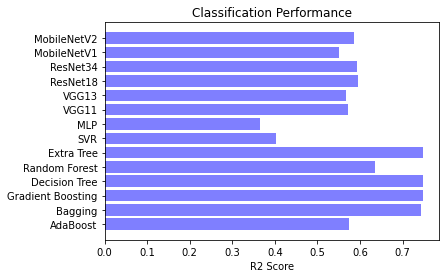

In [21]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()